In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('appa_data_26-07-2022.csv', encoding='windows-1252')

In [3]:
df = pd.read_csv('APPA data merged.csv', encoding='windows-1252')

/tmp/ipykernel_6842/3666399112.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('APPA data merged.csv', encoding='windows-1252')


In [109]:
#compare where the conc. of ozone is alarming during the last 3 days

dsCh = (ds.Stazione == "Parco S. Chiara") & (pd.to_numeric(ds.Valore) > 20)
dsBl = (ds.Stazione == "Via Bolzano") & (pd.to_numeric(ds.Valore) > 20)

if dsCh.count() > dsBl.count():
    print("dsCh is bigger")
else:
    print("dsBl is bigger ")

dsBl is bigger 


In [179]:
df = pd.read_csv('appa_data_26-07-2022.csv', encoding='windows-1252')

        Data         Inquinante         Stazione        Ora     Valore
0    2022-01     Biossido Zolfo  Parco S. Chiara  12.499348   3.358540
1    2022-01  Biossido di Azoto       A22 (Avio)  12.501961  52.384314
2    2022-01  Biossido di Azoto  Borgo Valsugana  12.501961  38.360784
3    2022-01  Biossido di Azoto       Monte Gaza  12.500000   2.446615
4    2022-01  Biossido di Azoto  Parco S. Chiara  12.500000  47.881201
..       ...                ...              ...        ...        ...
170  2022-07               PM10   Riva del Garda  12.500000  15.714286
171  2022-07               PM10         Rovereto  12.500000  15.166667
172  2022-07              PM2.5  Borgo Valsugana  12.493976   9.813253
173  2022-07              PM2.5  Parco S. Chiara  12.500000  10.845238
174  2022-07              PM2.5         Rovereto  12.500000  10.892857

[175 rows x 5 columns]


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '2022-01'),
  Text(1, 0, '2022-02'),
  Text(2, 0, '2022-03'),
  Text(3, 0, '2022-04'),
  Text(4, 0, '2022-05'),
  Text(5, 0, '2022-06'),
  Text(6, 0, '2022-07')])

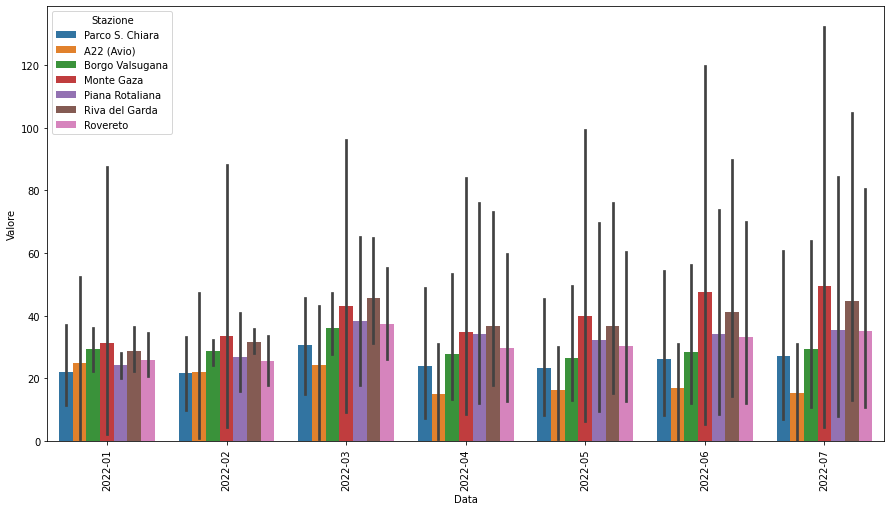

In [44]:
from matplotlib.pyplot import xticks

df = df[df.Valore != "n.d."]
df["Data"] = df.Data.str[0:7]
df["Valore"] = pd.to_numeric(df.Valore)
ds_curr_year = df[df['Data'] >= "2022-01"]
df_month_poll = ds_curr_year.groupby(['Data', "Inquinante", "Stazione"]).mean().reset_index()
print(df_month_poll)
plt.gcf().set_size_inches(15, 8)
sns.barplot(y="Valore", x="Data",  hue="Stazione", data=df_month_poll)
xticks(rotation = 90)

insert a year
insert a month
result: 06
2020-06


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Biossido Zolfo'),
  Text(1, 0, 'Biossido di Azoto'),
  Text(2, 0, 'Ossido di Carbonio'),
  Text(3, 0, 'Ozono'),
  Text(4, 0, 'PM10'),
  Text(5, 0, 'PM2.5')])

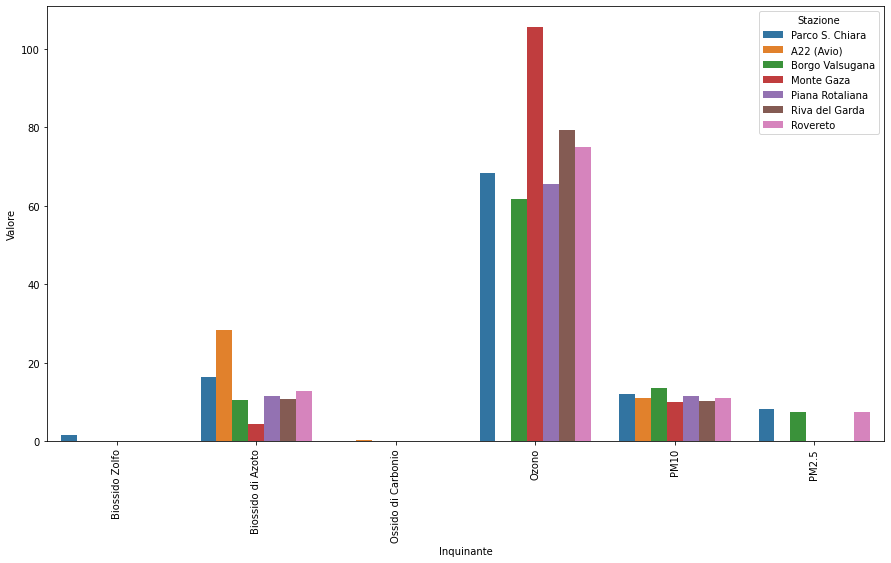

In [18]:
#conc of each poll in a specific month 
from matplotlib.pyplot import xticks

print("insert a year")
year = input()

print("insert a month")
month = input()

if (len(month) < 2) :
    month = month.zfill(2)
    print("result: "+month)
if len(year) < 4 or len(month) > 12:
    raise Exception("Date provided is in the wrong format")

date = year+"-"+month
print(date)

df = df[df.Valore != "n.d."]
df["Data"] = df.Data.str[0:7]
df["Valore"] = pd.to_numeric(df.Valore)
ds_curr_date = df[df['Data'] == date]
df_month_poll = ds_curr_date.groupby(["Inquinante", "Stazione", "Data"]).mean().reset_index()
plt.gcf().set_size_inches(15, 8)
sns.barplot(y="Valore", x="Inquinante", hue="Stazione", data=df_month_poll)
xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '2022-01'),
  Text(1, 0, '2022-02'),
  Text(2, 0, '2022-03'),
  Text(3, 0, '2022-04'),
  Text(4, 0, '2022-05'),
  Text(5, 0, '2022-06'),
  Text(6, 0, '2022-07')])

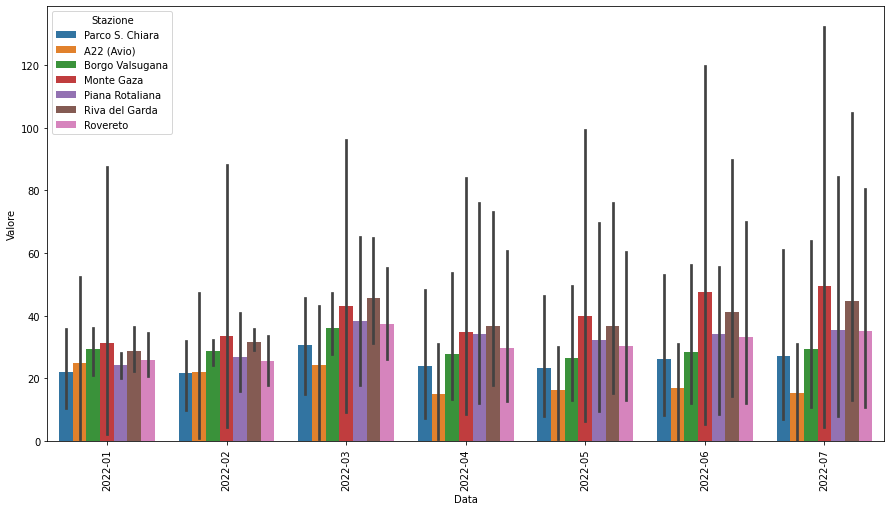

In [9]:
from matplotlib.pyplot import xticks

df = df[df.Valore != "n.d."]
df["Data"] = df.Data.str[0:7]
df["Valore"] = pd.to_numeric(df.Valore)
ds_curr_year = df[df['Data'] >= "2022-01"]
df_month_poll = ds_curr_year.groupby(['Data', "Inquinante", "Stazione"]).mean().reset_index()
plt.gcf().set_size_inches(15, 8)
sns.barplot(y="Valore", x="Data", hue="Stazione", data=df_month_poll)
xticks(rotation = 90)

insert a starting year
insert a starting month
2022-07-20
insert a ending year
insert a ending month
2022-07-27
insert target concentration


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '2022-01'),
  Text(1, 0, '2022-02'),
  Text(2, 0, '2022-03'),
  Text(3, 0, '2022-04'),
  Text(4, 0, '2022-05'),
  Text(5, 0, '2022-06'),
  Text(6, 0, '2022-07')])

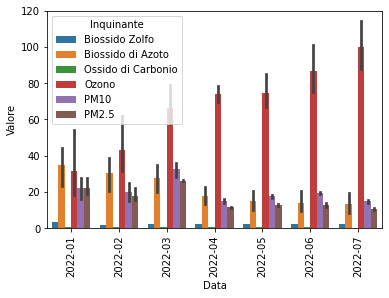

In [197]:
#compare polution of pm10 in santa chiara
print("insert a starting year")
day1 = input()
print("insert a starting month")
month1 = input()
date_start = "2022-" +month1+ "-"+day1
print(date_start)

print("insert a ending year")
day2 = input()
print("insert a ending month")
month2 = input()
date_end = "2022-" +month2+ "-"+day2
print(date_end)

print("insert target concentration")
concen = input()

ds_gas_day = df[(df.Inquinante == "PM10") & (df.Data > date_start) 
                & (df.Data < date_end) & (df.Valore == concen)] 

sns.barplot(y="Valore", x="Data", hue="Inquinante", data=df_month_poll)
xticks(rotation = 90)